<a href="https://colab.research.google.com/github/dcpetit/Astronomy/blob/main/data_plots_SNRatioPynPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plot the $data$ obtained from the S/N tables generated from PynPoint

In [16]:
import pandas as pd
import numpy as np
import scipy.io
from astropy.io import fits
import matplotlib.pyplot as plt
plt.style.use('ggplot')
font = {#'family' : 'normal',
        #'color' : 'white',
        #'weight' : 'bold',
        'size'   : 11}                          
plt.rc('font', **font)
#path = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/' ###
#file = 'SNR_FormattedByHand.csv'
#fileGood = 'ff_variable-table_to_file.txt'
#file2= 'ff_variable-table_properties.txt'

#df = pd.read_csv(path+file, header=None)#, sep=',') # Now obsolete...?
#df = np.load(path+'ff_variable-table_to_file.npy')
df = np.load('ff_variable-table_to_file.npy')
#print(df)

In [17]:
# extract number of images taken in an observation (angles fits file) to calculate Model Completenesses
#fits_FilePath = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/'  ########
#fits_FilePath = fits_FilePath+'angles.fits'
fits_FilePath = 'angles.fits'
#fits_FilePath = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/51Eri_28Nov2019/data.fits' #####
print(fits_FilePath)
fits_image_filename = fits.open(fits_FilePath)
fits_image_filename.info()
print(fits_image_filename)
print(fits_image_filename.info(0))
print(fits_image_filename.info(0)[0][4]) # this is 5 and 'cards'
print(fits_image_filename.info(0)[0][5][0]) # this is dimensions/number of exposures/images 
print(fits_image_filename[0].data)

N_tot_lambda = fits_image_filename.info(0)[0][5][0]
print('the length of the header is', len(fits_image_filename[0].header))
print(fits_image_filename[0].header)
#print(fits_image_filename.info(0)[0][5][2])
#print(fits_image_filename.info(0)[0][5][3])
                                                    #hdul = fits.open(fits_image_filename)
PC_max_SDI = 39-1 #or is it 38?
PC_max_ADI = N_tot_lambda - 1 # = the number of images - 1
PC_max_SADI = 39-1
PC_max_ASDI = 10 # WHAT IS THIS ONE????????????????????????????????????????????????????
PC_max_CODI = (N_tot_lambda*39) - 1 # = PC_max_ADI * PC_max_SDI

angles.fits
Filename: angles.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (32,)   float64   
[(0, 'PRIMARY', 1, 'PrimaryHDU', 5, (32,), 'float64', '')]
5
32
[17.10792503 18.04861444 19.00754622 19.94279229 20.87967121 21.83354603
 22.80021385 23.7361827  24.67226941 25.64268633 26.66322205 27.64449798
 28.60997872 29.57157742 30.54446954 31.52492384 32.49536969 33.46763605
 34.46496023 35.42006557 36.40736831 37.39081194 38.40896634 39.38236154
 40.37439087 41.34595291 42.32240888 43.28713799 44.25890071 45.2366961
 46.19115248 47.14049291]
the length of the header is 5
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                   32                                                  EXTEND  =                    T         

In [18]:
df2= pd.read_table("ff_variable-table_properties.txt", header=None, delimiter=',')  # delimiter={',', '(', ')'}
PCAs1 = int(df2[0][0][1])
PCAs2 = int(df2[1][0])
wavelength_index = int(df2[2][0])

# A for loop to organize the data_frame into a plotable SNRatios
SN_table = np.zeros( ( PCAs1, PCAs2, wavelength_index ), dtype=float, order='C') #print(SN_table)
model_completeness = np.zeros( ( PCAs1, PCAs2, 2 ), dtype=float, order='C')
#print('the SN table is \n', SN_table)
bad_character = [ '[', ' ', ',', ']' ]
# (i+1)/(39-1) is for SDI
# (j+1)/(N_tot_lambda - 1) is for ADI
for i in range(3): 
    for j in range(3):
        for k in range(39): # 39 rows in the file/data
            SN_table[i, j, k] = df[i][j][k]
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for ASDI          

print(model_completeness[1,1])
print('\n\n', SN_table[0][0][0])
print('\n\n', SN_table[0][0])
print('\n\n', SN_table[0])
print('\n\n', SN_table)

# For now, take the Max(SNR) for each PCA, use that. Later, use the whole function of SNRs
# Can then make heat maps: techniques vs. max(SNR)... x:adi y:sdi
# Use all of the 4 Beta Pic observations




[0.06451613 0.05263158]


 -5.068927868737066


 [ -5.06892787  -7.69372865 -13.23461088 -15.76111697 -16.22072067
 -14.23506577 -15.11923599  -9.6000944   -2.25695799  -1.80063037
   3.7601493   12.00888587  21.34123199  44.29846457  56.52364695
  38.54138008  19.5598317    7.11511083  11.34677932  23.66153379
  34.40453773  32.91334577  10.46506453  14.19883018   0.81558458
  15.82684355  10.27358591  13.55258174  18.44541723  25.9327469
  44.12780555  64.41001624  75.2301801  101.90001517  81.08318556
  61.58741003  47.37710585  16.74994089   2.33216869]


 [[ -5.06892787  -7.69372865 -13.23461088 -15.76111697 -16.22072067
  -14.23506577 -15.11923599  -9.6000944   -2.25695799  -1.80063037
    3.7601493   12.00888587  21.34123199  44.29846457  56.52364695
   38.54138008  19.5598317    7.11511083  11.34677932  23.66153379
   34.40453773  32.91334577  10.46506453  14.19883018   0.81558458
   15.82684355  10.27358591  13.55258174  18.44541723  25.9327469
   44.12780555  64.41001624  75.

In [19]:
# Color spectra used for plots
clrs = ['brown', 'maroon', 'red', 'tomato', 'coral', 'darkorange', 'tan', 'orange', 'wheat', 'gold', 'darkkhaki', 'lightyellow', 'olive', 'yellow', 'yellowgreen', 'chartreuse', 'darkseagreen', 'lightgreen', 'forestgreen', 'lime', 'springgreen', 'aquamarine', 'lightseagreen', 'lightcyan', 'teal', 'darkcyan', 'cyan', 'skyblue', 'slategray', 'royalblue', 'navy', 'slateblue', 'blue', 'mediumpurple', 'blueviolet', 'indigo', 'darkviolet', 'thistle', 'plum', 'purple', 'magenta', 'deeppink', 'crimson', 'pink']
greens = ['#88ff6b', '#7bff5b', '#6aff45', '#58ff30', '#45ff18', '#32ff00', '#28cf00', '#21ac00', '#1c8f00', '#167000', '#0f5000', '#092d00', '#031200']

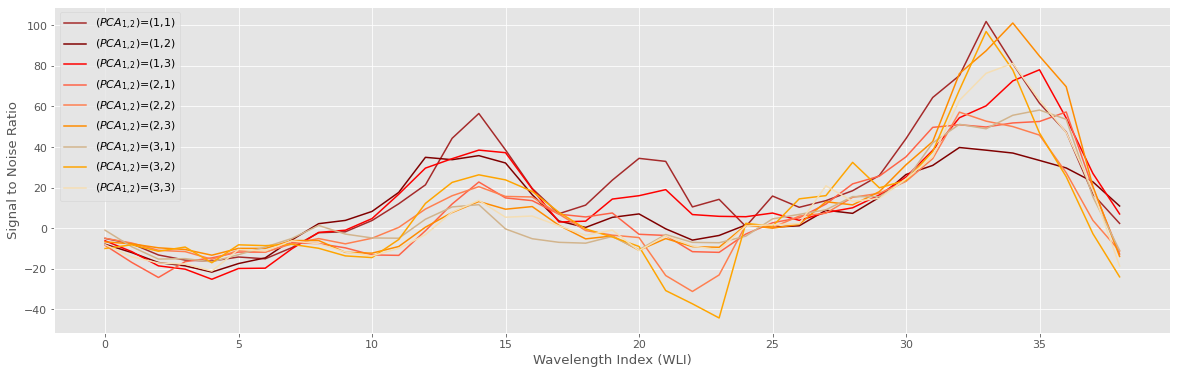

In [20]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
plt.figure(figsize = (20, 6))
for i in range(3):
    for j in range(3):
        plt.plot(range(len(SN_table[0][0])), SN_table[j][i], color=clrs[3*i+j], label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
plt.legend()

In [21]:
# Plot things #2: Constant PCA1, plot PCA2 on varying wavelenths; constant PCA2, plot PCA1 on varying wavelenths

[-5.068927868737066, -8.466560153252544, -1.0194918428609552, -7.9210544536369945, -4.999512637654866, -10.036347329214385, -6.23826734234448, -6.776510533931845, -8.167572396251005]
[0.1 0.1 0.1 0.2 0.2 0.2 0.3 0.3 0.3]


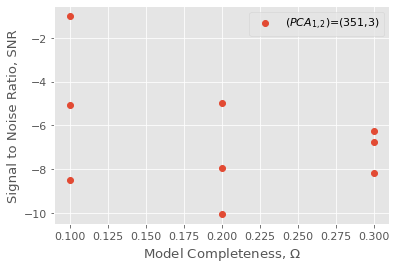

In [22]:
# Plot things #3 (research's goal): sdi residual shape
PC_max = PC_max_ASDI
PC_used= []
for i in range(3):
    for j in range(3):
        #print(i+1,j+1)
        PC_used.append([i+1, j+1])
#print(PC_used)
#PC_used = len(SN_table[j][i])    #evaluate(pipeline, 'ADI+SDI', ([1,2,3], [1,2,3]))
                                # ((1,1) (1,2) (1,3))
                                # ((2,1) (2,2) (2,3)) 
                                 # Do I need many observations now? Or just use the sum of the i+j column as te number of pcas used?

model_completeness = np.array(np.divide(PC_used, PC_max))
first_element_of_nine_arrays = []
for i in range(len(SN_table.flatten())):
    #print(i)
    if i % 39 == 0:
        #print(SN_table.flatten()[i])
        first_element_of_nine_arrays.append(SN_table.flatten()[i])
print(first_element_of_nine_arrays)
#print(model_completeness)
print(model_completeness[:,0])
#print(SN_table)
plt.plot(model_completeness[:,0], first_element_of_nine_arrays, 'o', label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') # , color=clrs[3*i+j]
plt.xlabel('Model Completeness, $\Omega$')
plt.ylabel('Signal to Noise Ratio, SNR')
plt.legend()


In [23]:
# Put this in the first cell eventually...
path_2018 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2018-12-15_results/' ###
file_2018 = 'SNR_FormattedByHand.csv'
#file_2018 = 'ff_variable-table_to_file.txt'
file2_2018= 'ff_variable-table_properties.txt'

path_2016 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2016-11-18_results/' ###
file_2016 = 'SNR_FormattedByHand.csv'
#file_2016 = 'ff_variable-table_to_file.txt'
file2_2016= 'ff_variable-table_properties.txt'

path_2015 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2015-11-30_results/' ###
file_2015 = 'SNR_FormattedByHand.csv'
#file_2015 = 'ff_variable-table_to_file.txt'
file2_2015= 'ff_variable-table_properties.txt'

df_2018 = pd.read_csv(path_2018+file, header=None) #change file name?
df_2016 = pd.read_csv(path_2016+file, header=None)
df_2015 = pd.read_csv(path_2015+file, header=None)

df2_2018= pd.read_table(path_2018+file2, header=None, delimiter=',')
df2_2016= pd.read_table(path_2016+file2, header=None, delimiter=',')
df2_2015= pd.read_table(path_2015+file2, header=None, delimiter=',')

PCAs1_2018 = int(df2_2018[0][0][1])
PCAs1_2016 = int(df2_2016[0][0][1])
PCAs1_2015 = int(df2_2015[0][0][1])

PCAs2_2018 = int(df2_2018[1][0])
PCAs2_2016 = int(df2_2016[1][0])
PCAs2_2015 = int(df2_2015[1][0])

wavelength_index_2018 = int(df2_2018[2][0])
wavelength_index_2016 = int(df2_2016[2][0])
wavelength_index_2015 = int(df2_2015[2][0])

SN_table_2018 = np.zeros( ( PCAs1_2018, PCAs2_2018, wavelength_index_2018 ), dtype=float, order='C')
SN_table_2016 = np.zeros( ( PCAs1_2016, PCAs2_2016, wavelength_index_2016 ), dtype=float, order='C')
SN_table_2015 = np.zeros( ( PCAs1_2015, PCAs2_2015, wavelength_index_2015 ), dtype=float, order='C')

for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table_2018[i, 0, k] = df_2018[i][k]     # print('df_2018[i][k] is:', df_2018[i][k])
            SN_table_2016[i, 0, k] = df_2016[i][k]
            SN_table_2015[i, 0, k] = df_2015[i][k]
        elif i == 4 or i == 5 or i == 6:
            SN_table_2018[i-4, 1, k] = df_2018[i][k]
            SN_table_2016[i-4, 1, k] = df_2016[i][k]
            SN_table_2015[i-4, 1, k] = df_2015[i][k]
        elif i == 8 or i == 9 or i == 10:
            SN_table_2018[i-8, 2, k] = df_2018[i][k]
            SN_table_2016[i-8, 2, k] = df_2016[i][k]
            SN_table_2015[i-8, 2, k] = df_2015[i][k]
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
#print(SN_table[0][0])

FileNotFoundError: ignored

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))
fig.suptitle('Signal to Noise Ratios on Waveindex Number for 3 Observations')
for i in range(3):
    for j in range(3):
        ax1.plot(range(len(SN_table_2018[0][0])), SN_table_2018[j][i], color=clrs[3*i+j], label='($PCA_{2018: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax2.plot(range(len(SN_table_2016[0][0])), SN_table_2016[j][i], color=clrs[3*i+j], label='($PCA_{2016: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax3.plot(range(len(SN_table_2015[0][0])), SN_table_2015[j][i], color=clrs[3*i+j], label='($PCA_{2015: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###     
        '''
        a = np.empty(9)
        a[j] = i
        ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
        '''
ax1.set_ylim([-4, 5.2])
ax2.set_ylim([-4, 5.2])
ax3.set_ylim([-4, 5.2])
ax2.set_ylabel('Signal to Noise Ratio') #ax1.set_ylabel('Signal to Noise Ratio')
ax3.set_xlabel('Wavelength Index Number (WLI)')
ax1.set_title('2018', fontsize=10)
ax2.set_title('2016', fontsize=10)
ax3.set_title('2015', fontsize=10)
ax1.legend()
ax2.legend()
ax3.legend()

In [ ]:
# Plot the gradations of green colors
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 1, 1)
a = np.empty(9)
for i in range(len(greens)):
    for j in range(len(a)):
        a[j] = i
    ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
handles, labels = ax.get_legend_handles_labels() # This line flips the order of the legend, so it aligns with the plot's colors ###
plt.legend(handles[::-1], labels[::-1], title='Shades of green', loc='upper right') # same as line above

In [ ]:
'''        The Code Appendix



#mat_file = 'test_mat.mat'
# Now load in the data from the .mat that was just saved
#df = scipy.io.loadmat(mat_file)
# And just to check if the data is the same:  
#assert np.all(mat_file == matdata['out'])
#df = pd.read_table(path+file, header=None, delimiter='\t') # the numerical values are all of the "signal_to_noise"s
#df.to_csv(path+'SNR.csv', sep=' ')  
#for j in df:
    #print('j is: ', j)
    #dfNew = [i.split(' ', 999) for i in df]
    #dfNew = [i.split(' ', 999)[0] for i in j]
#print(dfNew)

    If good, turn the line above into an if statement (and the if statement into a function)
if df2[0][0][0] == '(' or df2[0][0][0] == ')':
    PCAs1 = df2[0][0][1]
else:
    PCAs1 = df2[0][0][0]


#plt.figure(figsize = (20, 6))
#ax = fig.add_subplot(3, 1, 1)


for i in range(PCAs1):
    for j in range(PCAs2):
        for k in range(wavelength_index):
            print(k)
            if j < 3:
                SN_table[i, j, k] = df[j][k]
            elif j == 4 or j == 5 or j == 6:
                SN_table[i, j, k] = df[j+1][k]
            elif j == 4 or j == 5 or j == 6:
                SN_table[i, j, k] = df[j+2][k]
            else:
                True
   
built_element = '' # or []? 
            if df[i][j][k] not in bad_character:   #if the character is a number
                if SN_table[i, j, k] == 0:
                    print(k)
                    print(df[i][j][k])
                    built_element = df[i][j][k]     #(unless it's the first character)
                else:
                    built_element.append(df[i][j][k])    #add it
            print('built_element is:', built_element)
            SN_table[i, j, k] = float(built_element)


for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table[i, 0, k] = df[i][k]
        elif i == 4 or i == 5 or i == 6:
            SN_table[i-4, 1, k] = df[i][k]
        elif i == 8 or i == 9 or i == 10:
            SN_table[i-8, 2, k] = df[i][k]
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
print(SN_table[0][0])
'''